In [59]:
import pandas as pd
import itertools
import numpy as np

In [45]:
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [46]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
labels = [iris_df[iris_df['class'] == label] for label in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']]

In [48]:
labels[0]['class'].unique()[0]

'Iris-setosa'

In [49]:
iris_df.columns[0]

'sepal_length'

## Iris はどんなデータか

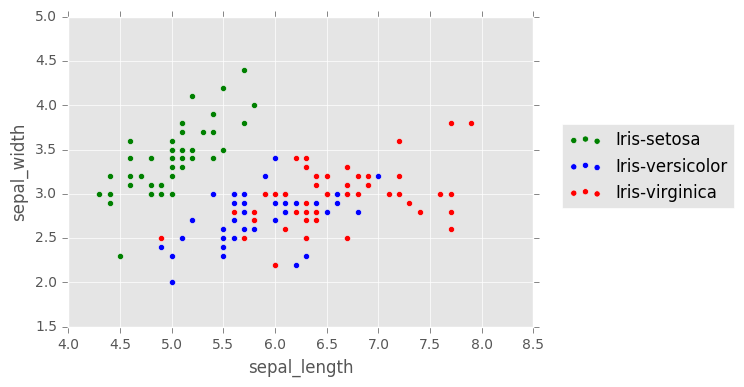

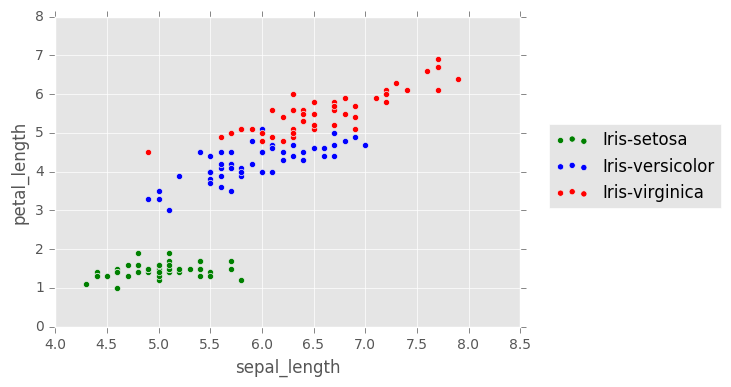

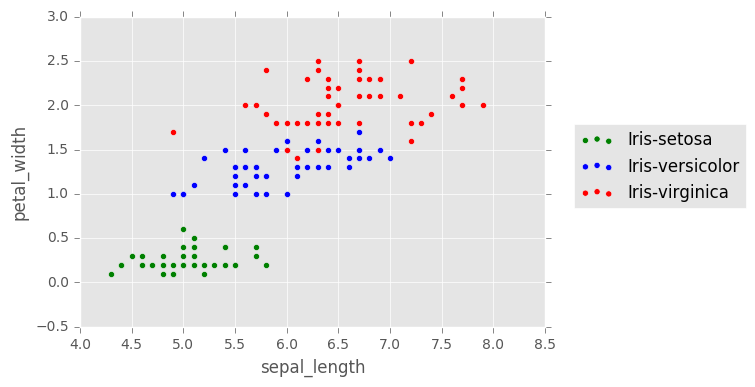

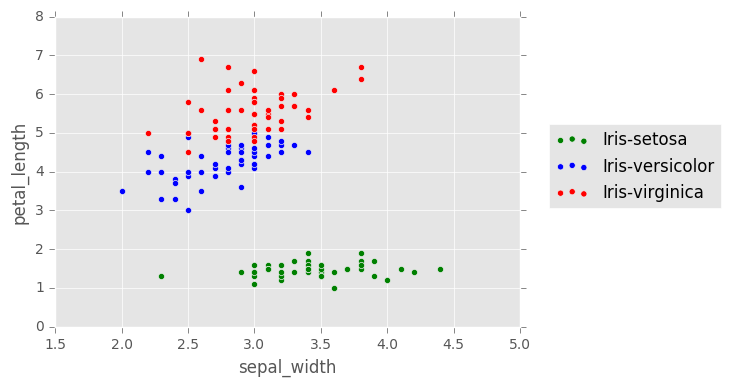

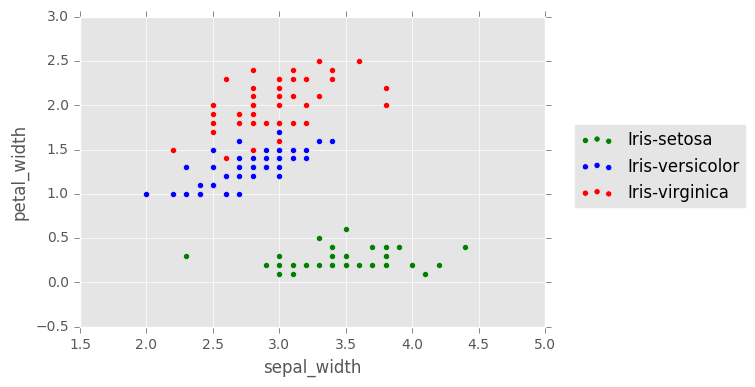

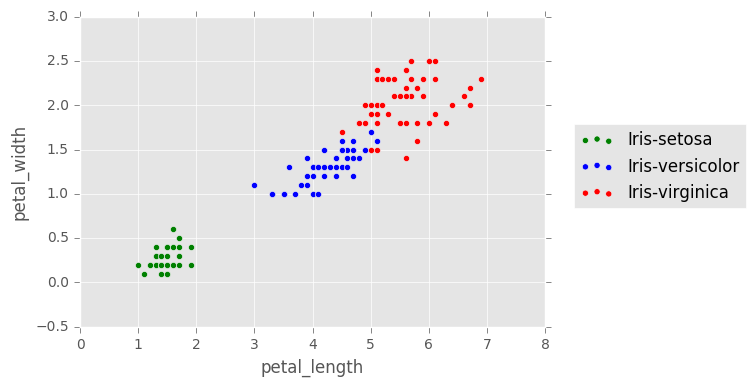

In [50]:
colors = ['green', 'blue', 'red']
for i, j in list(itertools.combinations(range(4), 2)):
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  for label, c in zip(labels, colors):
    x = label.ix[:, i]
    y = label.ix[:, j]
    ax.scatter(x, y, c=c, label=label['class'].unique()[0])
    ax.set_xlabel(iris_df.columns[i])
    ax.set_ylabel(iris_df.columns[j])
  ax.legend(bbox_to_anchor=(1.45, 0.68))
  fig.show()

---
## 最小二乗誤差を使って線形回帰してみる（ただの統計）

In [88]:
# データづくり
sample = iris_df[iris_df['class'] != 'Iris-setosa'].ix[:, ['sepal_length', 'petal_length']]

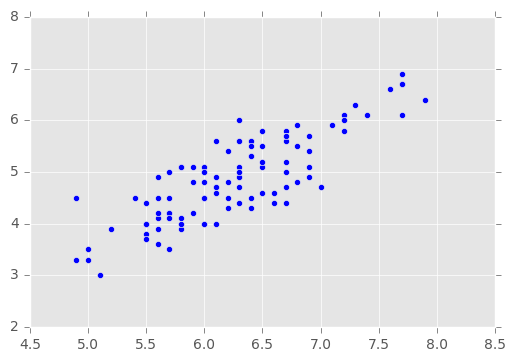

In [86]:
x = sample.ix[:, 0]
y = sample.ix[:, 1]
plt.scatter(x, y)
plt.show()

In [61]:
sample_np = np.array(sample)

### 計算式とか

「線形」回帰なので、直線を引けばいい

$$
f(x) = ax + b
$$

つまり、適切な傾き$a$と切片$b$を求めればいい

誤差 $E$ はあるデータ $i$ のとき、

$$
E_i = y_i - f(x_i)
$$

となる差のこと。これを一般化すると

$$
\sum^{n}_{i} (y_i - f(x_i))^2
$$

となり、これを上の式に代入すると

$$
\sum^{n}_{i} (y_i - ax_i + b)^2
$$

となり、これを最小化したいわけなので下のようになる

$$
{argmax}_{a,b} \sum^{n}_{i} (y_i - ax_i + b)^2
$$

最小化するには、上の式を偏微分して連立方程式を解いてゴニョゴニョして以下のようになる（上線は平均を指す）

$$
a = \frac{\sum(x - \bar{x})(y - \bar{y})}{\sum(x - \bar{x})^2}
$$

$$
b = \bar{y} - a \bar{x}
$$

In [82]:
# 各要素の平均
x_mean = np.mean(sample_np[:, 0])
y_mean = np.mean(sample_np[:, 1])
print (x_mean, y_mean)

(6.2620000000000005, 4.9059999999999997)


In [83]:
# 傾きと切片
a = np.dot((x - x_mean), (y - y_mean)) / np.dot((x - x_mean), (x - x_mean))
b = y_mean - a * x_mean
print (a, b)

(1.0318928811190096, -1.5557132215672382)


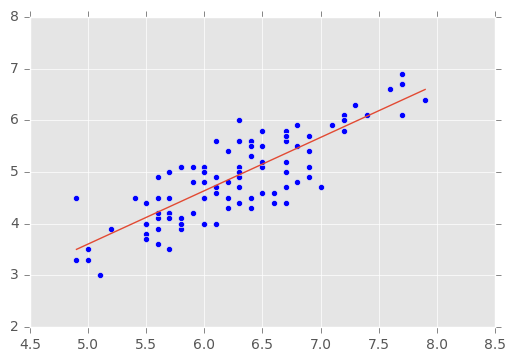

In [92]:
X = np.arange(np.min(x), np.max(x), 0.001)
Y = a * X + b
plt.scatter(x, y)
plt.plot(X, Y)
plt.show()